<a href="https://colab.research.google.com/github/cs255214340-hub/ml/blob/main/Spectral_Clustering.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Training Data:
[[ 4.3700039   0.99440597]
 [ 1.98890903  3.06467654]
 [-3.6155326   7.8180795 ]
 [ 3.04545118  1.37379466]
 [-0.19453906  7.14702094]
 [-2.40954626  8.51081047]
 [-6.18140388 -6.48662421]
 [ 3.92143461  1.75972253]
 [-7.12680457 -7.56209384]
 [ 2.57243674  1.88404964]
 [-7.04674527 -6.73339591]
 [-6.47137444 -8.5826932 ]
 [-5.67311822 -7.69704526]
 [ 5.03433098  1.5521852 ]
 [-2.70155859  9.31583347]
 [ 4.10937769  1.39735144]
 [-2.44896741 11.47752824]
 [ 5.51100354  1.64714615]
 [-6.71317498 -6.38765833]
 [-2.72886951  9.3713987 ]
 [ 3.31964563  3.80462845]
 [-2.54502366 10.57892978]
 [-5.4974682  -6.23139971]
 [ 2.92674431  3.32704206]
 [ 3.65415279  2.4772162 ]
 [-6.68378194 -7.85848237]
 [-3.39305506  9.16801123]
 [-6.85088237 -5.60165773]
 [-3.33819263  8.45410509]
 [-6.25781723 -8.45033431]
 [-1.6966718  10.37052616]
 [-6.65749342 -7.35885821]
 [-6.85130882 -6.85035345]
 [-4.05986105  9.0828491 ]
 [-6.15795513 -8.00916136]
 [-6.96936289 -5.43999238]
 [-5.94134339

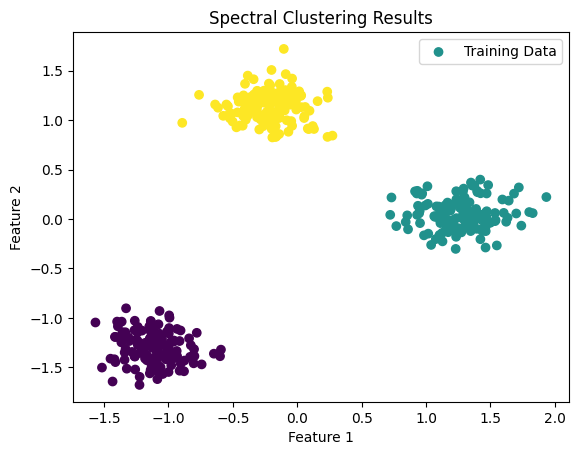

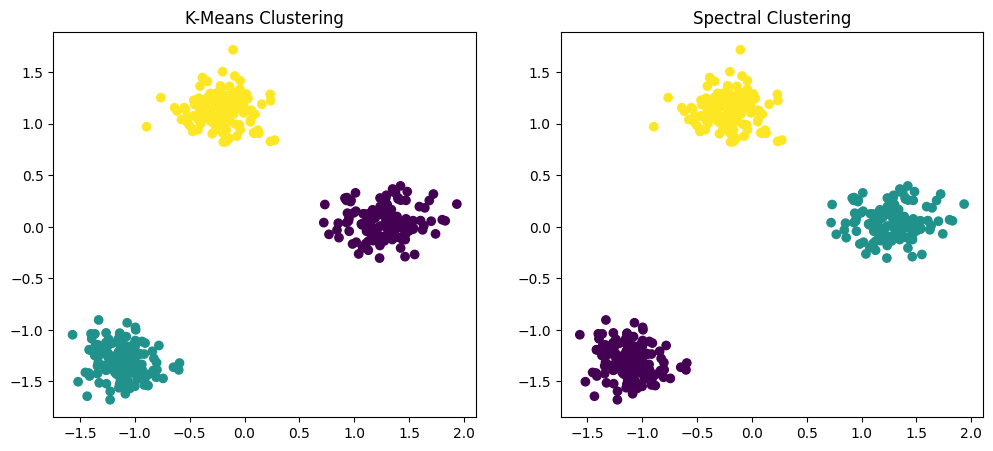

In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
import warnings
warnings.simplefilter("ignore", DeprecationWarning)
from sklearn.datasets import make_blobs
from sklearn.model_selection import train_test_split
from sklearn.cluster import KMeans, SpectralClustering
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import silhouette_score
X, _ = make_blobs(n_samples=500, centers=3, n_features=2, random_state=42)
X_train, X_test = train_test_split(X, test_size=0.2, random_state=42)
print("Training Data:")
print(X_train)
print("Testing Data:")
print(X_test)
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)
spectral = SpectralClustering(n_clusters=3, assign_labels="discretize",
random_state=42)
y_pred_spectral = spectral.fit_predict(X_train_scaled)
plt.scatter(X_train_scaled[:, 0], X_train_scaled[:, 1], c=y_pred_spectral, cmap='viridis',
marker='o', label="Training Data")
plt.xlabel("Feature 1")
plt.ylabel("Feature 2")
plt.title("Spectral Clustering Results")
plt.legend()
plt.show()
kmeans = KMeans(n_clusters=3, max_iter=500, random_state=42)
kmeans.fit(X_train_scaled)
y_pred_kmeans = kmeans.predict(X_train_scaled)
plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
plt.scatter(X_train_scaled[:, 0], X_train_scaled[:, 1], c=y_pred_kmeans, cmap='viridis',
marker='o', label="K-Means Clusters")
plt.title("K-Means Clustering")
plt.subplot(1, 2, 2)
plt.scatter(X_train_scaled[:, 0], X_train_scaled[:, 1], c=y_pred_spectral, cmap='viridis',
marker='o', label="Spectral Clustering")
plt.title("Spectral Clustering")
plt.show()